# 0.1 Imports

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

import os

from typing import Dict, List, Tuple, Sequence
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline

2024-12-17 22:01:11.041105: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-17 22:01:11.047701: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-17 22:01:11.063135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734472871.088470   28243 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734472871.096127   28243 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 22:01:11.123165: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# 1. Data Import & Cleaning

In [2]:
current_dir = os.getcwd()
current_dir

'/home/jupyter/powder_alert2.0'

In [3]:
relative_path = os.path.dirname(current_dir)
relative_path

'/home/jupyter'

In [4]:
file_name = "powder_alert2.0/preprocessed_historical_data.csv"
file_path = os.path.join(relative_path, file_name)

df = pd.read_csv(file_path, parse_dates=['date'], usecols=lambda col: col != '')

In [5]:
df.dtypes

Unnamed: 0                             int64
date                          datetime64[ns]
snowfall                             float64
weather_code_encoded                 float64
temperature_2m                       float64
relative_humidity_2m                 float64
dew_point_2m                         float64
precipitation                        float64
rain                                 float64
snow_depth                           float64
pressure_msl                         float64
surface_pressure                     float64
cloud_cover                          float64
cloud_cover_low                      float64
cloud_cover_mid                      float64
cloud_cover_high                     float64
et0_fao_evapotranspiration           float64
vapour_pressure_deficit              float64
wind_speed_10m                       float64
wind_speed_100m                      float64
wind_direction_10m                   float64
wind_direction_100m                  float64
wind_gusts

In [6]:
# Drop the first weird column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

df.head(3)

,date,snowfall,weather_code_encoded,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snow_depth,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,sunshine_duration,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
0,2009-01-01 00:00:00,0.00,3.0,-1.565276,-0.359492,-1.676971,-0.389763,-0.272938,0.821605,0.915229,-0.344468,0.796798,-1.084686,1.525737,-0.266834,-0.609045,-0.468303,0.915814,0.615276,-0.038465,0.000227,0.164295,-0.722739,0.000000,1.000000,0.433884,-0.900969,0.0,1.0
1,2009-01-01 01:00:00,0.00,3.0,-1.541233,-0.304528,-1.632742,-0.389763,-0.272938,0.821605,0.915229,-0.327194,0.769715,-1.059035,1.525737,0.286362,-0.619531,-0.473445,0.465664,0.069724,-0.051303,0.052709,-0.149584,-0.722739,0.258819,0.965926,0.433884,-0.900969,0.0,1.0
2,2009-01-01 02:00:00,0.07,10.0,-1.523201,-0.267453,-1.601150,-0.191058,-0.272938,0.821605,0.890052,-0.333781,0.661382,-1.084686,1.367563,0.412089,-0.619531,-0.476742,0.184326,-0.303696,-0.036381,0.185151,-0.541932,-0.732331,0.500000,0.866025,0.433884,-0.900969,0.0,1.0


In [7]:
df.shape

(131496, 29)

In [8]:
df = df.drop(columns="date")

In [9]:
df.columns

Index(['snowfall', 'weather_code_encoded', 'temperature_2m',
       'relative_humidity_2m', 'dew_point_2m', 'precipitation', 'rain',
       'snow_depth', 'pressure_msl', 'surface_pressure', 'cloud_cover',
       'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'sunshine_duration',
       'hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos',
       'month_sin', 'month_cos'],
      dtype='object')

In [10]:
df = df.drop_duplicates()
df = df.dropna()
print(f"✅ Data cleaned")

✅ Data cleaned


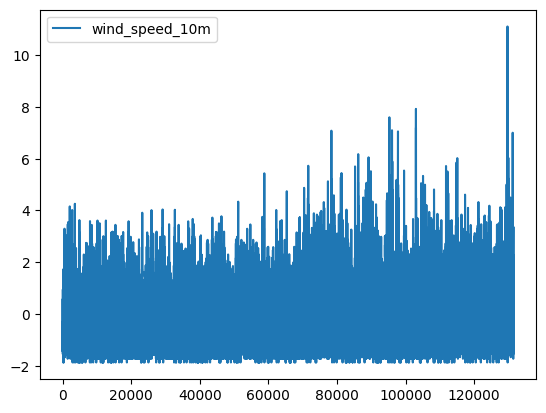

In [11]:
df.plot(y='wind_speed_10m');

In [12]:
df.head(3)

,snowfall,weather_code_encoded,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snow_depth,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,sunshine_duration,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
0,0.00,3.0,-1.565276,-0.359492,-1.676971,-0.389763,-0.272938,0.821605,0.915229,-0.344468,0.796798,-1.084686,1.525737,-0.266834,-0.609045,-0.468303,0.915814,0.615276,-0.038465,0.000227,0.164295,-0.722739,0.000000,1.000000,0.433884,-0.900969,0.0,1.0
1,0.00,3.0,-1.541233,-0.304528,-1.632742,-0.389763,-0.272938,0.821605,0.915229,-0.327194,0.769715,-1.059035,1.525737,0.286362,-0.619531,-0.473445,0.465664,0.069724,-0.051303,0.052709,-0.149584,-0.722739,0.258819,0.965926,0.433884,-0.900969,0.0,1.0
2,0.07,10.0,-1.523201,-0.267453,-1.601150,-0.191058,-0.272938,0.821605,0.890052,-0.333781,0.661382,-1.084686,1.367563,0.412089,-0.619531,-0.476742,0.184326,-0.303696,-0.036381,0.185151,-0.541932,-0.732331,0.500000,0.866025,0.433884,-0.900969,0.0,1.0


# 2. Dataset

In [13]:
target2 = "wind_speed_10m"

In [14]:
df.tail(1)

,snowfall,weather_code_encoded,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snow_depth,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,sunshine_duration,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
131495,0.0,1.0,-1.875245,-0.040464,-1.882762,-0.389763,-0.272938,1.403548,-0.280686,-1.495166,-0.719864,-1.084686,-0.978679,0.13549,-0.619531,-0.561763,0.696605,0.882111,-0.427446,-0.142219,-0.044957,-0.565147,-0.258819,0.965926,0.0,1.0,0.0,1.0


In [15]:
df.shape

(131496, 28)

# 3. Folds

In [16]:
rows = df.shape[0]
days = rows/24
weeks = days/7
months = weeks/4
years = months/ 12
print(f'DS includes {rows} rows --> hours')
print(f'DS includes {days} --> days')
print(f'DS includes {weeks} --> weeks')
print(f'DS includes {months} --> months')
print(f'DS includes {years} --> years')

DS includes 131496 rows --> hours
DS includes 5479.0 --> days
DS includes 782.7142857142857 --> weeks
DS includes 195.67857142857142 --> months
DS includes 16.306547619047617 --> years


In [17]:
FOLD_LENGTH = df.shape[0] # each fold will have the whole dataset --> only 1 fold in this model
FOLD_STRIDE = 1 # sliding only on hour
# Temporal Train-Test split
TRAIN_TEST_RATIO = 0.66
# Inputs
N_FEATURES = df.shape[1]
INPUT_LENGTH = 48 # 48 hours input = forecast the upcooming 48 hours
# Outputs
TARGET = target2
N_TARGETS = 1
OUTPUT_LENGTH = N_TARGETS*48 # - Predicting one target, the temperature - for two days with predictions every hour
# Additional parameters
HORIZON = 1 # - We are predicting next two days
TARGET_COLUMN_IDX = df.columns.get_loc(target2)

In [18]:
def get_folds(
    df: pd.DataFrame,
    fold_length: int,
    fold_stride: int) -> List[pd.DataFrame]:
    '''
    This function slides through the Time Series dataframe of shape (n_timesteps, n_features) to create folds
    - of equal `fold_length`
    - using `fold_stride` between each fold

    Returns a list of folds, each as a DataFrame
    '''

    folds = []
    for idx in range(0, len(df), fold_stride):
        # Exits the loop as soon as the last fold index would exceed the last index
        if (idx + fold_length) > len(df):
            break
        fold = df.iloc[idx:idx + fold_length, :]
        folds.append(fold)
    return folds

In [19]:
folds = get_folds(df, FOLD_LENGTH, FOLD_STRIDE)

print(f'The function generated {len(folds)} folds.')
print(f'Each fold has a shape equal to {folds[0].shape}.')

The function generated 1 folds.
Each fold has a shape equal to (131496, 28).


In [20]:
fold = folds[0]

In [21]:
fold.shape

(131496, 28)

# 4. Creating Sequences

In [22]:
def train_test_split(fold: pd.DataFrame,
                     train_test_ratio: float,
                     input_length: int,
                     horizon: int) -> Tuple[pd.DataFrame]:
    '''
    Returns a train dataframe and a test dataframe (fold_train, fold_test)
    from which one can sample (X,y) sequences.
    df_train should contain all the timesteps until round(train_test_ratio * len(fold))
    '''

    # TRAIN SET
    # ======================
    last_train_idx = round(train_test_ratio * len(fold))
    fold_train = fold.iloc[0:last_train_idx, :]

    # TEST SET
    # ======================
    first_test_idx = last_train_idx - input_length
    fold_test = fold.iloc[first_test_idx:, :]

    return (fold_train, fold_test)

In [23]:
(fold_train, fold_test) = train_test_split(fold,
                                           TRAIN_TEST_RATIO,
                                           INPUT_LENGTH,
                                           HORIZON)

In [24]:
fold_train.shape, fold_test.shape

((86787, 28), (44757, 28))

In [25]:
fold_train.index[0]

0

In [26]:
# Inputs
print("##### INPUTS #####")
print(f'- INPUT_LENGTH = {INPUT_LENGTH} timesteps = {int(INPUT_LENGTH/24)} days = {int(INPUT_LENGTH/24/7)} weeks')
print(f'- N_FEATURES = {N_FEATURES}')
# Outputs
print("##### OUTPUTS #####")
print(f'- OUTPUT_LENGTH = {OUTPUT_LENGTH} timesteps = {int(OUTPUT_LENGTH/24)} day(s)')
print(f'- N_TARGETS = {N_TARGETS}')
# Parameters
print("##### PARAMETERS #####")
print(f'- HORIZON = {HORIZON} timesteps = {int(HORIZON/24)} day(s)')
# Train
print("##### TRAIN SET #####")
print(f"- The training fold starts at index {fold_train.index[0]} and stops at index {fold_train.index[-1]}.")
# Test
print("##### TEST SET #####")
print(f"- The test fold starts at index {fold_test.index[0]} and stops at index {fold_test.index[-1]}.")

##### INPUTS #####
- INPUT_LENGTH = 48 timesteps = 2 days = 0 weeks
- N_FEATURES = 28
##### OUTPUTS #####
- OUTPUT_LENGTH = 48 timesteps = 2 day(s)
- N_TARGETS = 1
##### PARAMETERS #####
- HORIZON = 1 timesteps = 0 day(s)
##### TRAIN SET #####
- The training fold starts at index 0 and stops at index 86786.
##### TEST SET #####
- The test fold starts at index 86739 and stops at index 131495.


In [27]:
# New: Scanning  through a fold
STRIDE = 1 # sliding every day, for instance
print(f'STRIDE = {STRIDE} timesteps = {int(STRIDE/24)} day(s)')

STRIDE = 1 timesteps = 0 day(s)


In [28]:
def get_Xi_yi(first_index: int,
              fold: pd.DataFrame,
              horizon: int,
              input_length: int,
              output_length: int) -> Tuple[np.ndarray, np.ndarray]:
    '''
    - extracts one sequence from a fold
    - returns a pair (Xi, yi) with:
        * len(Xi) = `input_length` and Xi starting at first_index
        * len(yi) = `output_length`
        * last_Xi and first_yi separated by the gap = horizon -1
    '''

    Xi_start = first_index
    Xi_last = Xi_start + input_length
    yi_start = Xi_last + horizon - 1
    yi_last = yi_start + output_length

    Xi = fold[Xi_start:Xi_last]
    yi = fold[yi_start:yi_last][TARGET]

    return (Xi, yi)

In [29]:
def get_X_y(fold: pd.DataFrame,
            horizon: int,
            input_length: int,
            output_length: int,
            stride: int,
            shuffle=False) -> Tuple[np.ndarray, np.ndarray]:
    """
    - Uses `data`, a 2D-array with axis=0 for timesteps, and axis=1 for (targets+covariates columns)
    - Returns a Tuple (X,y) of two ndarrays :
        * X.shape = (n_samples, input_length, n_covariates)
        * y.shape =
            (n_samples, output_length, n_targets) if all 3-dimensions are of size > 1
            (n_samples, output_length) if n_targets == 1
            (n_samples, n_targets) if output_length == 1
            (n_samples, ) if both n_targets and lenghts == 1
    - You can shuffle the pairs (Xi,yi) of your fold
    """

    X = []
    y = []

    for i in range(0, len(fold), stride):
        ## Extracting a sequence starting at index_i
        Xi, yi = get_Xi_yi(first_index=i,
                           fold=fold,
                           horizon=horizon,
                           input_length=input_length,
                           output_length=output_length)
        ## Exits loop as soon as we reach the end of the dataset
        if len(yi) < output_length:
            break
        X.append(Xi)
        y.append(yi)

    X = np.array(X)
    y = np.array(y)
    y = np.squeeze(y)

    if shuffle:
        idx = np.arange(len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

    return X, y

In [30]:
X_train, y_train = get_X_y(fold=fold_train,
                           horizon=HORIZON,
                           input_length=INPUT_LENGTH,
                           output_length=OUTPUT_LENGTH,
                           stride=STRIDE)
X_test, y_test = get_X_y(fold=fold_test,
                         horizon=HORIZON,
                         input_length=INPUT_LENGTH,
                         output_length=OUTPUT_LENGTH,
                         stride=STRIDE)

print("Shapes for the training set:")
print(f"X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")

print("Shapes for the test set:")
print(f"X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")

Shapes for the training set:
X_train.shape = (86692, 48, 28), y_train.shape = (86692, 48)
Shapes for the test set:
X_test.shape = (44662, 48, 28), y_test.shape = (44662, 48)


## 4.2 Scale

In [31]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1]))
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1]))

# Correct reshaping back to 3D
X_train = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test_scaled.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Correct scaling and reshaping for y
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Ensure correct reshaping of y
y_train = y_train_scaled.reshape(-1, y_train.shape[-1])
y_test = y_test_scaled.reshape(-1, y_test.shape[-1])

# Print shapes for verification
print(f"X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")
print(f"X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")

X_train.shape = (86692, 48, 28), y_train.shape = (86692, 48)
X_test.shape = (44662, 48, 28), y_test.shape = (44662, 48)


# 5. Modelling

## 5.1 Main Model

In [39]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Normalization, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

def init_model(X_train):
    reg_l2 = regularizers.L2(0.1)

    #========================================================================================

    # 1 - RNN architecture
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1], X_train.shape[2])))

    # Recurrent Layer
    model.add(layers.LSTM(units=32, activation='tanh',return_sequences=True,
                        #   recurrent_dropout=0.3,dropout=0.3
                        )
                          )

    # Hidden Dense Layer that we are regularizing
    model.add(layers.Dense(16, activation="relu",
                        #    kernel_regularizer = reg_l2
                        )
                           )
    # model.add(layers.Dropout(rate=0.3))

    # Predictive Dense Layer
    model.add(layers.Dense(1, activation='linear'))

    #========================================================================================

    # 2 - Compiler
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss='mse', optimizer=optimizer, metrics=["mae"])

    return model

In [40]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, ModelCheckpoint

def fit_model(model: tf.keras.Model, verbose=1) -> Tuple[tf.keras.Model, dict]:

    es = EarlyStopping(
        monitor="val_mae",
        patience=10,
        mode="min",
        restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(
        monitor='val_mae',
        factor=0.1,
        patience=5,
        min_lr=1e-6)

    checkpoint = ModelCheckpoint(
        'model_v1_best.keras', 
        monitor='val_mae',
        save_best_only=True,
        mode='min', 
        verbose=1)

    history = model.fit(
        X_train,
        y_train,
        validation_split=0.3,
        shuffle=False,
        batch_size=128,
        epochs=100,
        callbacks=[es, reduce_lr, checkpoint],
        verbose=verbose)

    return model, history

In [41]:
def plot_history(history):

    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE ---
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- METRICS:MAE ---

    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    return ax

In [42]:
model = init_model(X_train)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 48, 32)         │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 48, 16)         │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 48, 1)          │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,353 (32.63 KB)

 Trainable params: 8,353 (32.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
474/475 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0719 - mae: 0.2096
Epoch 1: val_mae improved from inf to 0.14179, saving model to model_v1_best.keras
475/475 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - loss: 0.0718 - mae: 0.2095 - val_loss: 0.0328 - val_mae: 0.1418 - learning_rate: 1.0000e-04
Epoch 2/100
473/475 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0267 - mae: 0.1305
Epoch 2: val_mae improved from 0.14179 to 0.12280, saving model to model_v1_best.keras
475/475 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.0267 - mae: 0.1305 - val_loss: 0.0249 - val_mae: 0.1228 - learning_rate: 1.0000e-04
Epoch 3/100
473/475 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0209 - mae: 0.1155
Epoch 3: val_mae improved from 0.12280 to 0.11344, saving model to model_v1_best.keras
475/475 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0209 - mae: 0.1154 - val_loss: 0.0214 - val_mae: 0.1134 - learning_rate: 1.0000e-04
Epoch 4/100
473/475 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0181 - mae: 0.1078


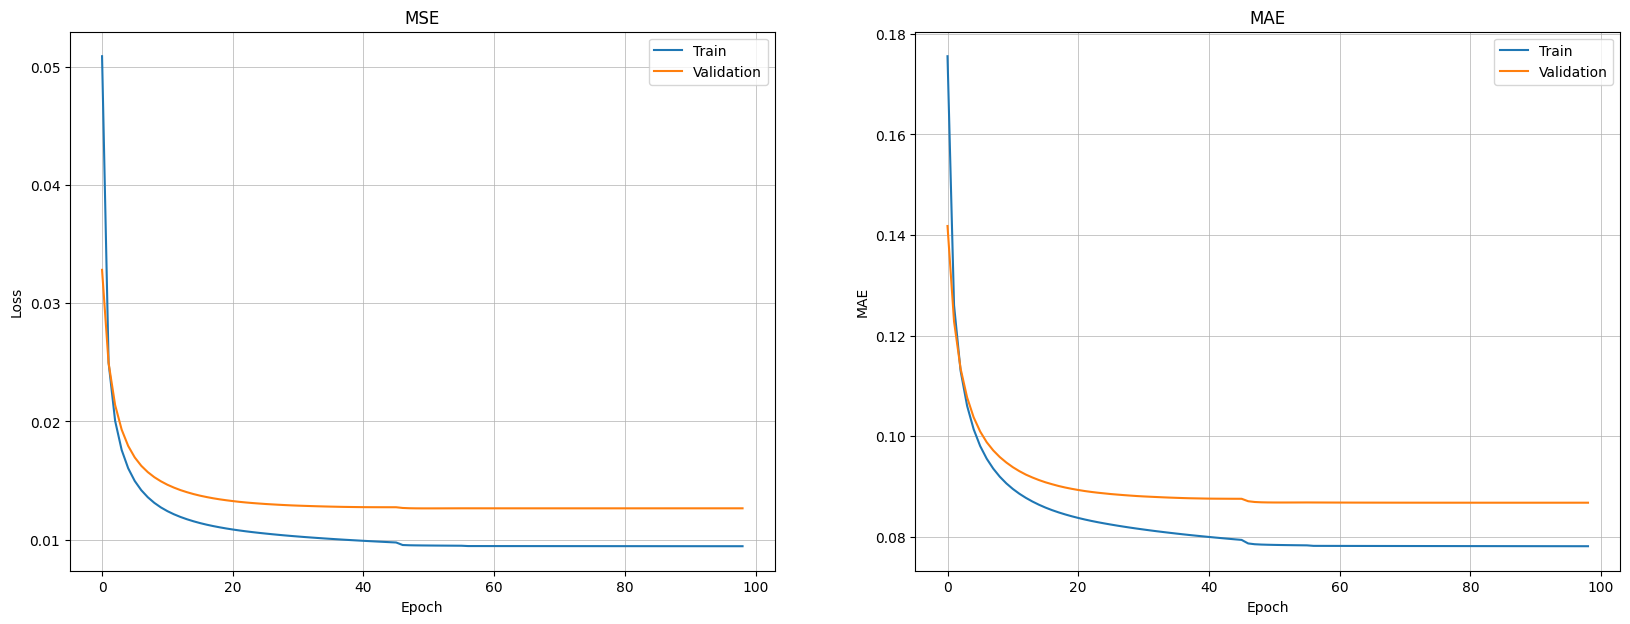

In [43]:
# 2 - Training
# ====================================
model, history = fit_model(model, verbose=1)

plot_history(history);

# 3 - Evaluation
# ====================================
res = model.evaluate(X_test, y_test)
print("-"*50)
print(f"The LSTM MAE on the test set is equal to {round(res[1],2)} Celsius degrees")

## 5.2 Baseline

In [44]:
def last_seen_value_baseline(X_test, y_test, target_column_idx=0):
    """
    Baseline model that predicts the last observed value of the target variable (temperature).

    Parameters:
    X: Input features (shape: [num_samples, time_steps, num_features])
    y: Ground truth values (shape: [num_samples, time_steps, num_targets])
    target_column_idx: Index of the target variable in the input features

    Returns:
    baseline_mae: Mean Absolute Error (MAE) of the baseline model
    """
    # Get the last observed value of the target (temperature) for each sample
    last_seen_values = X_test[:, -1, target_column_idx].reshape(-1, 1)

    # Repeat this value for all the output steps
    output_length = y_test.shape[1]  # Number of time steps in the target sequence
    repeated = np.repeat(last_seen_values, axis=1, repeats=output_length)

    # Calculate the MAE: Mean of absolute errors
    mae = np.mean(np.abs(y_test - repeated))

    return mae

In [45]:
# 1 - Evaluation of the Baseline Model
# ====================================
mae_baseline = last_seen_value_baseline(X_test, y_test, target_column_idx=0)
print(f"- The Baseline MAE on the test set is equal to {round(mae_baseline,2)} Celsius degrees")

# 4 - Comparison with the LSTM model
# ====================================
print(f"- The LSTM MAE on the test set is equal to {round(res[1],2)} Celsius degrees")
print(f"👉 Improvement/decrease of the LSTM model over the baseline (on this fold for the test set): {round((1 - (res[1]/mae_baseline))*100,2)} % 👈")

- The Baseline MAE on the test set is equal to 0.73 Celsius degrees
- The LSTM MAE on the test set is equal to 0.09 Celsius degrees
👉 Improvement/decrease of the LSTM model over the baseline (on this fold for the test set): 87.91 % 👈


## 5.3 Optimizing on Hyperparameters

In [46]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel
from keras_tuner import RandomSearch

class LSTMModel(HyperModel):
    def build(self, hp):
        reg_l2 = regularizers.L2(hp.Float('l2_reg', min_value=0.001, max_value=0.1, step=0.001))

        #========================================================================================

        model = models.Sequential()

        # Input Layer
        model.add(layers.Input(shape=(X_train.shape[1], X_train.shape[2])))

        # Recurrent Layer with tunable units and dropout
        model.add(layers.LSTM(
            units=hp.Int('units', min_value=16, max_value=128, step=16),
            activation='tanh',
            return_sequences=True,
            recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.2, max_value=0.5, step=0.05),
            dropout=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.05)
        ))
        model.add(layers.LSTM(
            units=hp.Int('units', min_value=16, max_value=128, step=16),
            activation='tanh',
            return_sequences=True,
            recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.2, max_value=0.5, step=0.05),
            dropout=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.05)
        ))

        # Hidden Dense Layer with tunable regularization
        model.add(layers.Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation="relu",
            kernel_regularizer=reg_l2
        ))
        model.add(layers.Dropout(rate=hp.Float('dense_dropout', min_value=0.2, max_value=0.5, step=0.05)))

        # Output Layer
        model.add(layers.Dense(1, activation='linear'))

        #========================================================================================

        # Compile the model
        model.compile(
            loss='mse',
            optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')),
            metrics=["mae"]
        )

        return model

In [47]:
es = EarlyStopping(
    monitor="val_mae",
    patience=3,
    mode="min",
    restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(
    monitor='val_mae',
    factor=0.1,
    patience=3,
    min_lr=1e-6)

checkpoint = ModelCheckpoint(
    'model_v1_best.keras', 
    monitor='val_mae',
    save_best_only=True,
    mode='min', 
    verbose=1)


tuner = RandomSearch(
    LSTMModel(),  # The HyperModel class
    objective='val_mae',  # We want to minimize validation MAE
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='models',  # Directory to store logs and models
    project_name='temperature_hyperparameters')

tuner.search(
    X_train,
    y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.3,  # Use a validation split
    callbacks=[es, reduce_lr, checkpoint])

Reloading Tuner from models/temperature_hyperparameters/tuner0.json


In [48]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Build the best model with those hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    callbacks=[es, reduce_lr, checkpoint])

# Evaluate the best model on the test set
test_results = best_model.evaluate(X_test, y_test)
print(f"Test MAE: {test_results[1]} Celsius degrees")

Best Hyperparameters: {'l2_reg': 0.07200000000000001, 'units': 48, 'recurrent_dropout': 0.2, 'dropout': 0.25, 'dense_units': 96, 'dense_dropout': 0.4, 'learning_rate': 0.004817189232254613}
Epoch 1/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.4653 - mae: 0.0921
Epoch 1: val_mae improved from inf to 0.08334, saving model to model_v1_best.keras
542/542 ━━━━━━━━━━━━━━━━━━━━ 50s 85ms/step - loss: 0.4646 - mae: 0.0921 - val_loss: 0.0124 - val_mae: 0.0833 - learning_rate: 0.0048
Epoch 2/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0108 - mae: 0.0834
Epoch 2: val_mae did not improve from 0.08334
542/542 ━━━━━━━━━━━━━━━━━━━━ 44s 81ms/step - loss: 0.0108 - mae: 0.0834 - val_loss: 0.0122 - val_mae: 0.0834 - learning_rate: 0.0048
Epoch 3/100
542/542 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0106 - mae: 0.0825
Epoch 3: val_mae did not improve from 0.08334
542/542 ━━━━━━━━━━━━━━━━━━━━ 44s 81ms/step - loss: 0.0106 - mae: 0.0825 - val_loss: 0.0125 - val_mae: 0.0857 - learning_

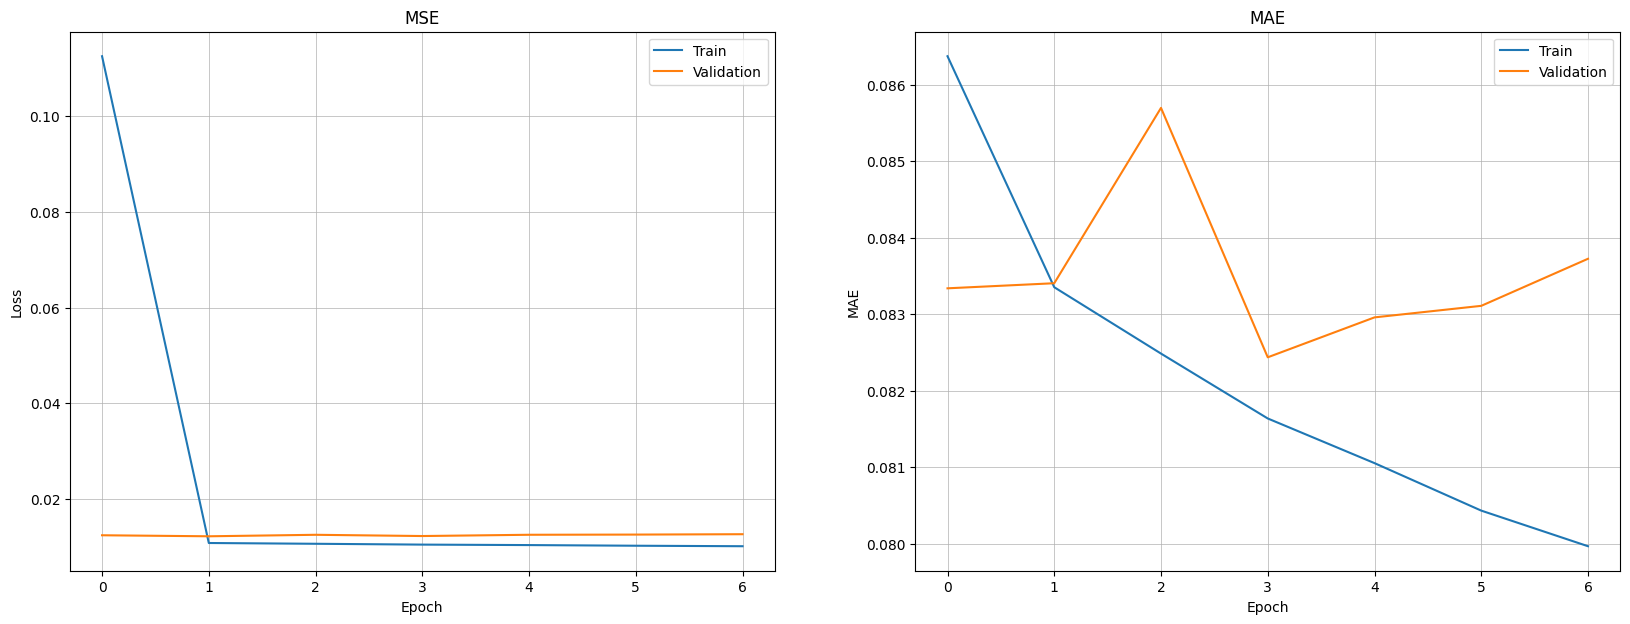

In [49]:
plot_history(history);

# 5.3. Safe/ Load model

In [50]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras import models

In [51]:
relative_path = os.path.dirname(current_dir)
models_folder = os.path.join(relative_path, "powder_alert2.0/models")

save_as_keras = os.path.join(models_folder, 'wind_speed_10m.keras')

In [52]:
model.save(save_as_keras)

In [53]:
loaded_model_keras = tf.keras.models.load_model(save_as_keras)

# 6. Prediction

In [72]:
from datetime import datetime, timedelta

In [73]:
file_name = "powder_alert2.0/preprocessed_prediction_data.csv"
file_path = os.path.join(relative_path, file_name)

df = pd.read_csv(file_path, parse_dates=['date'], usecols=lambda col: col != '')

In [74]:
df.head(2)

,Unnamed: 0,date,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,sunshine_duration,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
0,0,2024-12-14 00:00:00,-2.074,55.0,-9.914110,0.0,0.0,0.0,0.22,3.0,1021.8,816.5264,100.0,0.0,100.0,100.0,0.012611,0.236865,7.28055,3.396233,261.46933,212.00534,25.919998,0.0,0.000000,1.000000,-0.974928,-0.222521,-0.5,0.866025
1,1,2024-12-14 01:00:00,-2.324,56.0,-9.919742,0.0,0.0,0.0,0.22,3.0,1021.4,816.0416,100.0,0.0,100.0,100.0,0.011692,0.227360,7.20000,3.600000,270.00000,216.86998,20.519999,0.0,0.258819,0.965926,-0.974928,-0.222521,-0.5,0.866025


In [75]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [76]:
df.shape

(96, 29)

In [77]:
current_time = datetime.now()
last_48_h = df[(df['date'] <= current_time) & (df['date'] > current_time - timedelta(hours=48))]
input_48h = last_48_h.drop(columns="date")

In [78]:
input_48h.shape

(48, 28)

In [79]:
input_48h = np.expand_dims(input_48h, axis=0)

In [80]:
input_48h = input_48h.astype(float)

In [81]:
input_48h.shape

(1, 48, 28)

In [82]:
best_model = loaded_model_keras

In [83]:
predictions = best_model.predict(input_48h)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [86]:
predictions_reshaped = predictions.reshape(predictions.shape[0], -1)

In [88]:
y_pred_original = scaler_y.inverse_transform(predictions_reshaped)

In [90]:
predicted_snowfall = y_pred_original[0]
print(f'The snowfall for the upcoming 48 h range from {predicted_snowfall.min()} to {predicted_snowfall.max()} cm/h')

The snowfall for the upcoming 48 h range from 0.14267052710056305 to 0.556819498538971 km/h


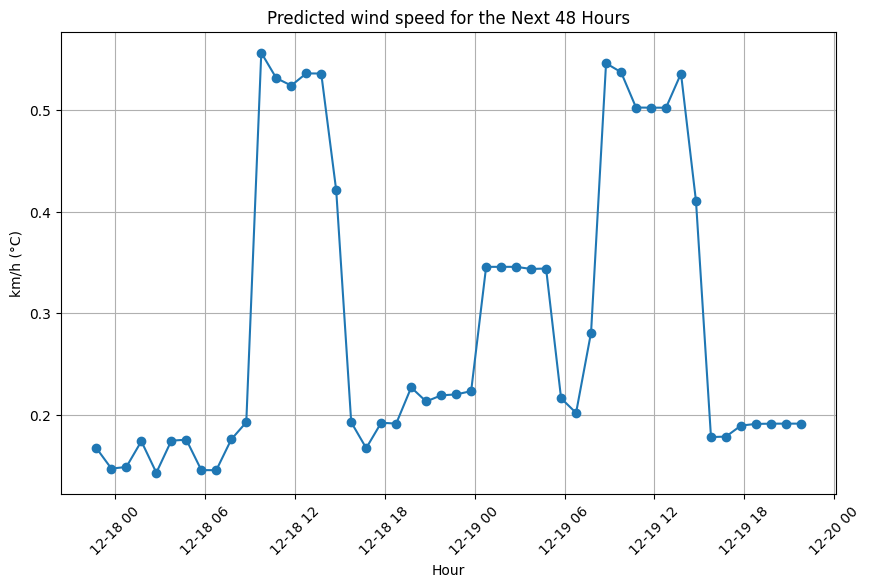

In [91]:
predicted_df = pd.DataFrame(predicted_snowfall, columns=["Predicted wind speed"])
predicted_df["Hour"] = pd.date_range(start=pd.to_datetime('now'), periods=48, freq='h')

# Plot the predicted temperatures
plt.figure(figsize=(10,6))
plt.plot(predicted_df["Hour"], predicted_df["Predicted wind speed"], marker='o')
plt.title("Predicted wind speed for the Next 48 Hours")
plt.xlabel("Hour")
plt.ylabel("km/h (°C)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show();